# PROJECT: INVESTIGATE TMDB MOVIE DATASET 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Description
The dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including users generated rating and revenue from distribution.
<br>
### Data Description <br>
 **0.   id:** Unique ID of the list <br>
 **1.   imdb_id:** ID of the movies on the IMDB system <br> 
 **2.   popularity:** A numeric quantity specifying the movie popularity provided by TMDB <br>
 **3.   budget:** The total funding for the movie creation + distribution process <br>
 **4.   revenue:** The total of domestic + international box office + DVD/copies sales <br>
 **5.   original_title:** The title of the movie before translation/adaptaion <br>
 **6.   cast:** The names of lead and supporting actros/actresses <br> 
 **7.   homepage:** A link to the homepage of the movie <br>
 **8.   director:** Name of the main director of the movie <br>
 **9.   tagline:** Movie's main taglines <br>
 **10.  keywords:** Movie's main keywords/tags <br>
 **11.  overview:** A brief description of the movie <br>
 **12.  runtime:** The total duration of the movie in minutes <br>
 **13.  genres:** The main themes of the movies - Action,Comedy, Thriller etc... <br>
 **14.  production_companies:** all the production involved in the making of the movie <br>
 **15.  release_date:** The official date the movie was released <br>
 **16.  release_year:** The year in which the movie was offically released <br>
 **17.  vote_count:** The count of votes received on IMDB <br>
 **18.  vote_average:** The average of votes received on IMDB <br> 
 **19.  budget_adj:** The total funding for the movie creation + distribution process adjusted for inflation to current level <br>
 **20.  revenue_adj:** The total of domestic + international box office + DVD/copies sales adjusted for inflation to current level <br>  

Often we would find blockbuster movies with big explosion, out of this world visual effect and flashy stunt - But overall, these thing are not necessary what make a high rating movie - there would also the writing, the theme, the casting, the dialogue, the cinematography, ... 
<br>
So in this article, i'm going to explore the characteristic of a relatively high rating movie - proxied by the average viewer rating in the TMDb dataset  

## Questions for Analysis
1. How have the movie market grow over the years?
2. How have the quality of each genres change over the years?
3. Is there any genres with overall better rating? 
4. Is there any month with overall better rating <br>
5. Does high rating often led to positive box office result? <br>


<a id='wrangling'></a>
## Data Wrangling

In [1]:
#!pip install wordcloud
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

In [2]:
raw = pd.read_csv('tmdb-movies.csv')
raw.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#check data types, missing rows, duplciates
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
raw.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The dataset contain 10866 records.
1. In which, budget and revenue (and subsequently adjusted budget and revenue) records are missing by more than 50% - It's realistics to assume these records are missing and not actually have zero revenue/budget.
2. Popularity has a huge variation from the 75% tile to the maximum value, this might be an indication of changing in the scale and size of media in modern day comparing to the 60s-90s
3. Some movies has runtime = 0. This is unrealistic and probably the result of missing data. As for the maximum value for runtime at 900 minutes, these are probably TV series and not cinema movies
4. Most movies have low vote count, with the 75% tile only at 146 votes. Low vote count can represent a biased rating so we may have to consider a threshold for representative rating
5. While the 50% and 75% tile are only around 6.0-6.6, the min value is at 1.5 and max value is at 9.2, suggest quite a variation in rating
6. While the data are from 1960s to 2015, the average value is at 2001 and 50% tỉle at 2006, suggest that most of the movies in the dataset are faily recent

In [5]:
raw.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning

#### Dropping duplicated rows

In [6]:
#Drop duplicates rows
raw = raw.drop_duplicates()
raw.duplicated().sum()

0

#### Dropping unnecessary columns which include: <br>
- indexing columns: `id`,`imdb_id` 
- descrption, tags and keywords: `tagline`,`keywords`, `overview`
- un-adjusted financial index: `budget`,`revenue`  

In [7]:
df = raw.drop(['id','imdb_id','tagline','keywords', 'overview','budget','revenue'], axis=1)

#### Formatting columns

In [8]:
#Formatting string columns for consistency 
df['genres'] = df['genres'].astype('str')
df['production_companies'] = df['production_companies'].astype('str')
df['cast'] = df['cast'].astype('str')

In [9]:
#Convert release date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'],format = '%m/%d/%y')

#### Removing rows due to missing data

**Budget & Revenue:** We see more than half of the movies in the dataset have these values equal to zero - this most likely mean the financial data are missing so in order to measure commercial success of the movies, these rows will need to be removed <br>
**Runtime:** the runtime column has a minimum of zero, which is unrealistic so these movies will also have to be remove for better estimation <br>

**Vote_count:** The vote_count vary from 10 to 9767 votes. Since a too low vote count would not be representative of the average viewers experience so we will set a minimal of 100 votes for the movies to be qualified for analysis 

In [10]:
#This dataframe is just for examining commercial result over the year 
df_fin = df.loc[(df['budget_adj'] >= 1000) & (df['revenue_adj'] >= 1000)]
df_fin.shape

(3819, 14)

In [11]:
#This dataframe is just for examining commercial result over the year 
df_vote = df.loc[(df['vote_count'] >= 100)]
df_fin.shape

(3819, 14)

In [12]:
#This dataframe is mainly to examin the relationship between commercial result vs quality of movies
df_clean = df.loc[(df['budget_adj'] >= 1000) & (df['revenue_adj'] >= 1000) & (df['vote_count'] >= 100)]
df_clean.shape

(2599, 14)

<a id='eda'></a>
## Exploratory Data Analysis

### 1. How have the movie market grow over the years?


C:\Users\TRUNG DUC\AppData\Local\Temp\ipykernel_24216\1332053217.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  budget_trend = df.groupby([df.release_year])['budget_adj','revenue_adj'].sum()


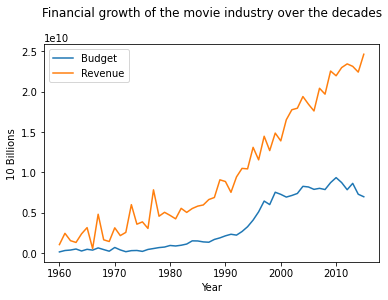

In [13]:
#Graphing the changing of total budget and total revenue of the movies in the dataset
budget_trend = df.groupby([df.release_year])['budget_adj','revenue_adj'].sum()

plt.plot(budget_trend, label = ['Budget','Revenue'])
plt.title(label = 'Financial growth of the movie industry over the decades', x = 0.5, y= 1.1)
plt.xlabel('Year')
plt.ylabel('10 Billions')
plt.legend(loc='upper left')

Since we are using the adjusted figure so effect of inflation and changing social economics has been minimized, and yet the trend is still clearly growing exponentially through the year <br>
though the diversion around afeter 2010 certainly seem interetsing <br>


C:\Users\TRUNG DUC\AppData\Local\Temp\ipykernel_24216\1752371980.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly =data_10s.groupby([(data_10s.index.year), (data_10s.index.month)])['budget_adj','revenue_adj'].sum()
C:\Users\TRUNG DUC\AppData\Local\Temp\ipykernel_24216\1752371980.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  annual = data_10s.groupby([(data_10s.index.year)])['budget_adj','revenue_adj'].sum()


Text(0, 0.5, 'Billions')

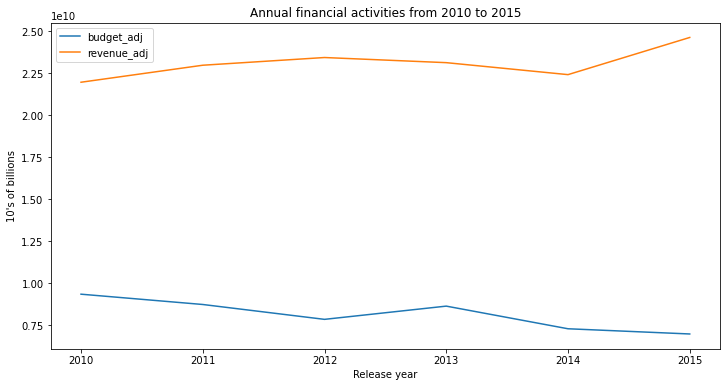

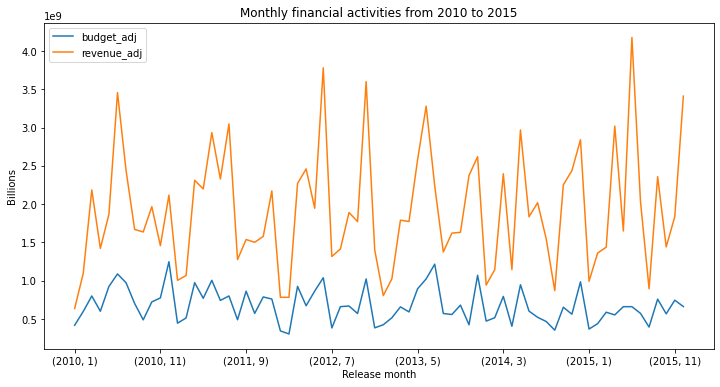

In [14]:
#Checking the data in the 2010s period
data_10s =df.loc[(df['release_date'] >= '1-1-2010') & (df['release_date'] <= '12-31-2019')]
data_10s.set_index('release_date', inplace=True)
monthly =data_10s.groupby([(data_10s.index.year), (data_10s.index.month)])['budget_adj','revenue_adj'].sum()
annual = data_10s.groupby([(data_10s.index.year)])['budget_adj','revenue_adj'].sum()
annual.plot(figsize = (12,6))
plt.title("Annual financial activities from 2010 to 2015")
plt.xlabel('Release year')
plt.ylabel("10's of billions")
monthly.plot(figsize = (12,6))
plt.title("Monthly financial activities from 2010 to 2015")
plt.xlabel('Release month')
plt.ylabel("Billions")

Despeite the over upward trend of movies profits, there's a slight downward trend in movie budget. While there's no clear turning point on the month-to-month graph, the over spending had been shrinking in the period of 2014 - 2015

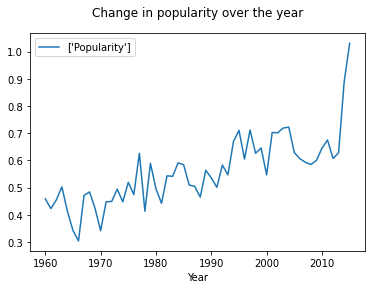

In [15]:
#Exploring the popularity of movies made through out the yeae
budget_trend = df.groupby([df.release_year])['popularity'].mean()

plt.plot(budget_trend, label = ['Popularity'])
plt.title(label = 'Change in popularity over the year', x = 0.5, y= 1.05)
plt.xlabel('Year')
plt.legend(loc='upper left')

Though this graph also share some similarity with the trend of financial influx, it can be biased since the records of popularity only start in recent years and
current movies would definitely have a bigger presence and fit closer to recent taste, thus earning a higher popularity rating

### 2. How have the quality of each genres change over the years?



In [16]:
#Define function to get all unique values of all movies
def get_unique(df, col):
    text_string = df[col].str.cat(sep='|')
    unique_val = list(set(text_string.split('|')))
    return unique_val

In [17]:
#Define function to cross reference all movie with specified text
def movie_filter(df1,col_filter, col_val,keywords):
    list_gen=[]
    for gen in keywords:
        x =df1.loc[df1[col_filter].str.contains(gen),col_val]
        list_gen.append(x)
    return list_gen

In [18]:
#Getting the list of all unique genres
genres = get_unique(df, 'genres')

In [19]:
#Creating an empty dataframe for average rating over the years of each genres
list_gen = movie_filter(df, 'genres','vote_average',genres)
genres_df = pd.DataFrame(index= genres, columns = range(1960,2016))   

In [20]:
#Calculating and filling out each cells with appropriate average rating
for gen in genres:
    for year in range(1960, 2016):
        genres_df.loc[gen,year] =df.loc[(df['genres'].str.contains(gen))&(df['release_year']==year),'vote_average'].mean()

In [21]:
#Checking the list of genre
genres

['Music',
 'History',
 'Mystery',
 'Horror',
 'Drama',
 'Animation',
 'Science Fiction',
 'Adventure',
 'Thriller',
 'Fantasy',
 'Crime',
 'TV Movie',
 'War',
 'Family',
 'Comedy',
 'Documentary',
 'Foreign',
 'Western',
 'nan',
 'Action',
 'Romance']

In [22]:
#Checking the dataframe
genres_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Music,6.6,6.2,5.4,NaN,6.42,6.95,NaN,5.9,6.6,5.45,...,6.35,6.46,6.5,6.188235,6.87,6.464706,6.868182,6.796667,6.475,6.442424
History,6.18,6.433333,6.55,6.2,6.7,5.875,6.05,NaN,6.666667,6.066667,...,6.216667,6.184615,6.641667,6.39375,6.885714,5.8375,6.130769,6.507143,6.606667,6.513333
Mystery,NaN,6.8,6.475,6.45,5.975,5.5,6.383333,6.6,7.2,5.7,...,5.96,6.026471,5.868966,5.67451,5.940625,5.918421,5.278788,5.657895,5.833333,5.642857
Horror,6.642857,6.633333,5.76,6.266667,6.016667,5.82,4.166667,5.925,6.725,5.3,...,5.333929,5.348101,5.144737,5.237778,5.066667,5.033333,4.922115,4.998039,5.053333,5.0088
Drama,6.276923,6.475,6.428571,6.223077,6.385,6.295,6.3125,6.74375,6.365,6.107692,...,6.154822,6.225381,6.080687,6.087946,6.08,6.151402,5.982759,6.074308,6.063028,6.078846


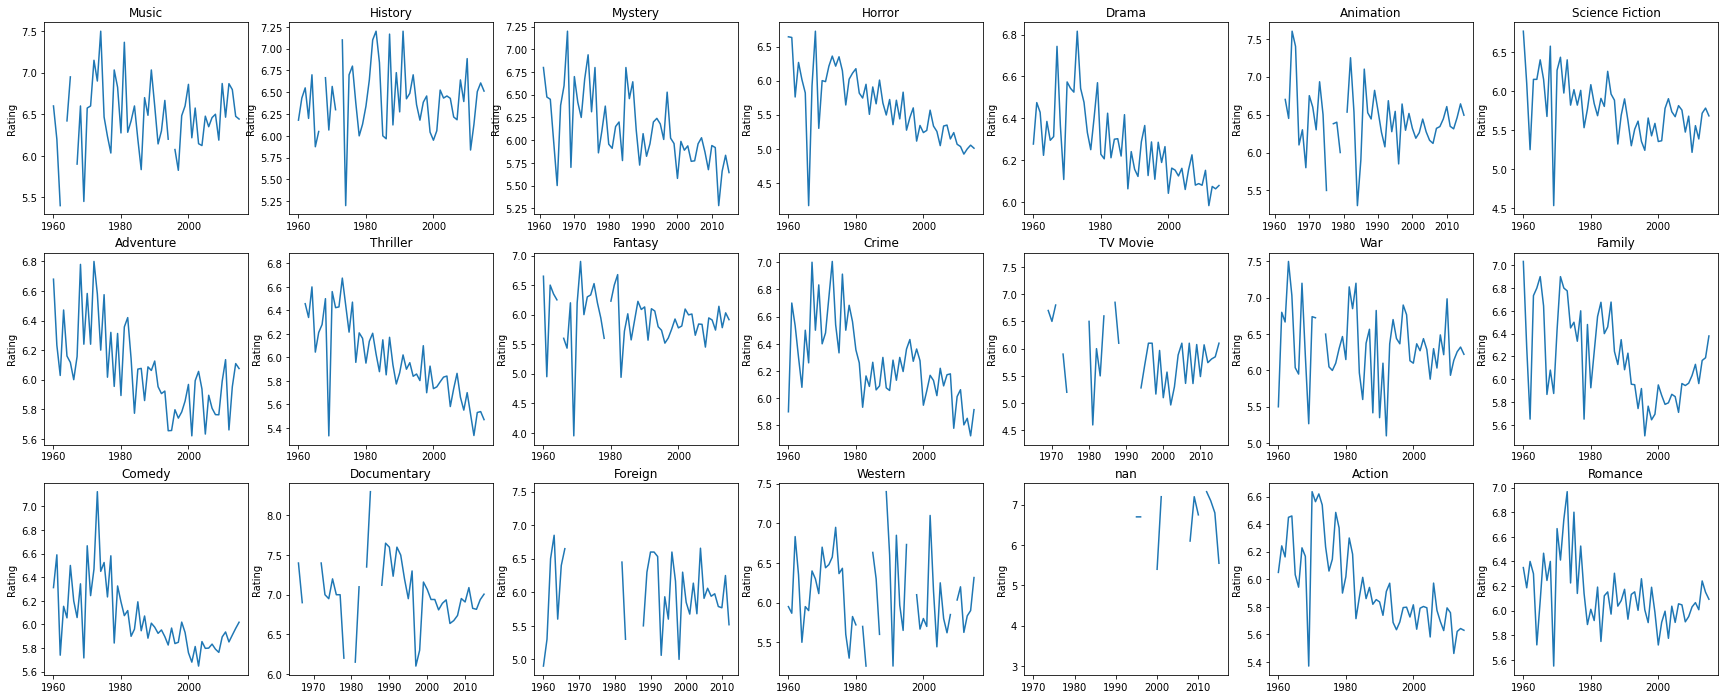

In [23]:
#Graphing the trend of average rating of each genres over the years
fig, axs = plt.subplots(3,7, figsize=(30,12))
axs = axs.ravel()
#for genre in genres:
for a in range(21):
    axs[a].plot(genres_df.iloc[a])
    axs[a].set_title(genres[a])
    axs[a].set_ylabel('Rating')
plt.show()

* Overall we observe certain genres have a clear downward trend over the decades, which include Horror, Thriller, Action, Comedy, Crime, Mystery, Drama.
* Some genres remain sideway in their rating, like War, Fantasy, Animation, Science Fiction, Romance, Music, History, Western. 
* Adventure and Family movies seeem to got downrate in the past but are making a revival after the 2000s
* Foreign and TV Movie seem to have a weak representation in the dataset with multiple years not presence, but from the availble data, the genres seem to going sideway
* Documentary movies while might not be present for all period but overall are quite highly rated, with its best year going above 8.0 in rating
* There seem to be some movies with their genres label missing around late 90s and around 2010s

### 3. Is there any genres with overall better rating? 

C:\Users\TRUNG DUC\AppData\Local\Temp\ipykernel_24216\2015251887.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genres)


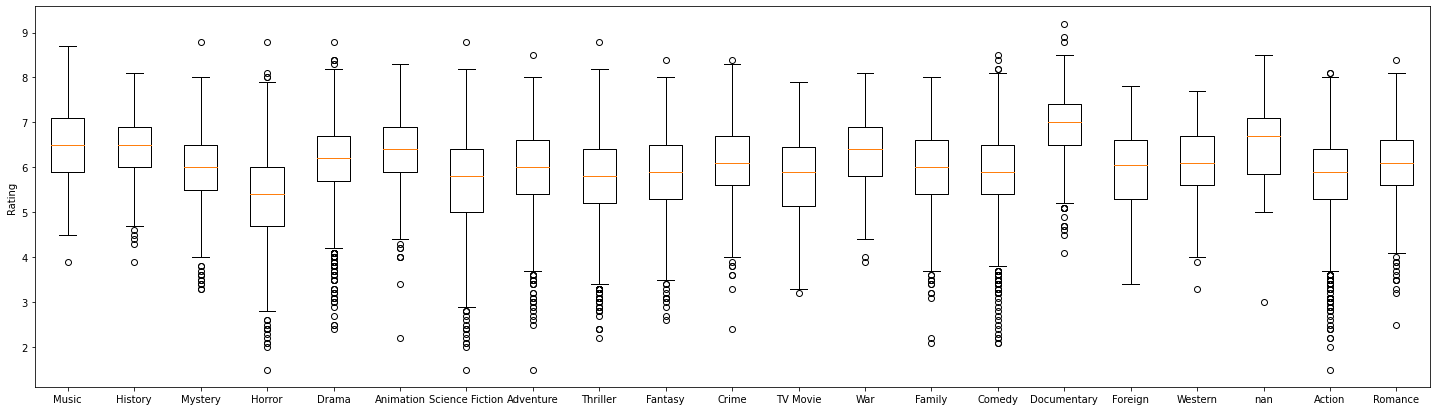

In [25]:
#Getting the list of all unique genres
genres = get_unique(df, 'genres')

#Get the average rating of each genres
list_gen = movie_filter(df, 'genres','vote_average',genres)
#Graph the boxplot of each genres
fig = plt.figure(figsize=(25,7))
ax = fig.add_subplot(111)
ax.set_title('')
ax.set_xticklabels(genres)
plt.boxplot(list_gen)
plt.ylabel('Rating')
plt.show()

In [26]:
#Checking numeric values of average rating for each genres
genres_df.transpose().mean().sort_values(ascending=False)

Documentary        7.012765
Music              6.466812
Animation          6.425752
History            6.412629
War                6.325950
Crime              6.270615
Drama              6.270220
Family             6.186566
nan                6.135000
Romance            6.131659
Mystery            6.126560
Western            6.095510
Adventure          6.070309
Comedy             6.053620
Foreign            6.029077
Thriller           5.993541
Action             5.953975
Fantasy            5.923555
TV Movie           5.822137
Science Fiction    5.773325
Horror             5.641592
dtype: float64

Serious genres like documentary, history and crim 

### 4. Is there any months with overall better rating?

C:\Users\TRUNG DUC\AppData\Local\Temp\ipykernel_24216\3814458692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vote['release_month'] = df_vote['release_date'].dt.strftime('%b')


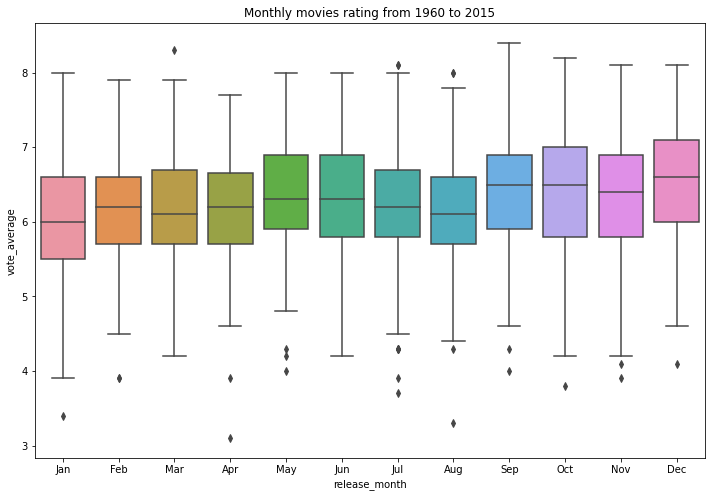

In [37]:
#Finding the release month of each movies for calculation using the list of movies with more than 100 votes
df_vote['release_month'] = df_vote['release_date'].dt.strftime('%b')
orders = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#Graphing the distribution of rating of each month
fig, ax = plt.subplots()
fig.set_size_inches((12,8))
sns.boxplot(x='release_month', y='vote_average', order=orders, data=df_vote,ax=ax)
plt.title('Monthly movies rating from 1960 to 2015 (filtered)')
plt.show()

In this graph we observe the period starting of the summer vacation (around May and June) and the end of year (from September to December), especially around December, have relatively better average rating comparing to the rest of the year

In [28]:
#Checking monthly average rating numeric values
df_vote.groupby('release_month')['vote_average'].mean().sort_values(ascending=False)

release_month
Dec    6.497832
Sep    6.412895
Oct    6.388535
May    6.369767
Nov    6.338148
Jun    6.320382
Jul    6.220275
Feb    6.212322
Mar    6.196327
Apr    6.195516
Aug    6.136842
Jan    6.060119
Name: vote_average, dtype: float64

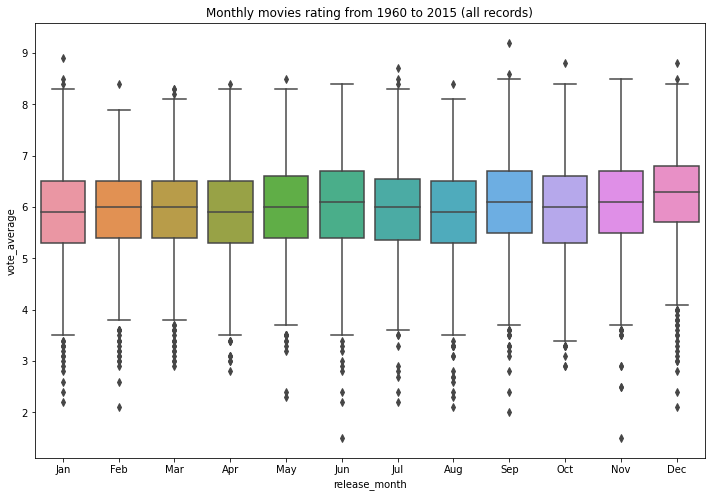

In [39]:
#Checking the data from the original dataset to double check
df['release_month'] = df['release_date'].dt.strftime('%b')
orders = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, ax = plt.subplots()
fig.set_size_inches((12,8))
sns.boxplot(x='release_month', y='vote_average', order=orders, data=df,ax=ax)
plt.title('Monthly movies rating from 1960 to 2015 (all records)')
plt.show()

Using the unfiltered dataset, which include movies with less than 100 votes, we observe an overall lower average rating, with much more outlier comparing to the graph only using movies with more than 100 votes. 
Even so, June, September and December all still boost a relatively better overall rating comparing to the other months.

In [30]:
df.groupby('release_month')['vote_average'].mean().sort_values(ascending=False)

release_month
Dec    6.189442
Sep    6.068069
Nov    6.062654
Jun    6.012092
May    5.967985
Oct    5.959844
Jul    5.928411
Mar    5.928102
Feb    5.918524
Apr    5.875533
Jan    5.870620
Aug    5.840087
Name: vote_average, dtype: float64

### 5. Does high rating often led to positive box office result?

In [31]:
#Calculating profit for movies 
df_fin['profit'] = df['revenue_adj'] - df['budget_adj']
df['profit'] = df['revenue_adj'] - df['budget_adj']
df_clean['profit'] = df_clean['revenue_adj'] - df['budget_adj']

C:\Users\TRUNG DUC\AppData\Local\Temp\ipykernel_24216\2139339200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['profit'] = df['revenue_adj'] - df['budget_adj']
C:\Users\TRUNG DUC\AppData\Local\Temp\ipykernel_24216\2139339200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['profit'] = df_clean['revenue_adj'] - df['budget_adj']


In [32]:
#Checking the rating to be qualified as high rating movies
print("The 90% tile of all movies rating: {}".format(np.percentile(df['vote_average'],90)))
print("The 90% tile of movies with more than 100 votes count: {}".format(np.percentile(df_vote['vote_average'],90)))

The 90% tile of all movies rating: 7.1
The 90% tile of movies with more than 100 votes count: 7.3


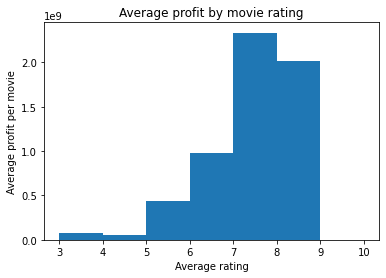

In [33]:
#Graphing average movies profit by average rating - using movies with budget and revenue >1000 
pv =df_fin.loc[:,['profit','vote_average']]
pv_mean = pv.groupby('vote_average').mean()
plt.hist(pv_mean.index, weights = pv_mean.profit, bins= range(3,11))
plt.title('Average profit by movie rating')
plt.xlabel('Average rating')
plt.ylabel('Average profit per movie')
plt.show()

We observe better profit per movie as the rating of the movie increase, especially after the 90% tile (around 7.1 to 7.3 depend on filtering rules)

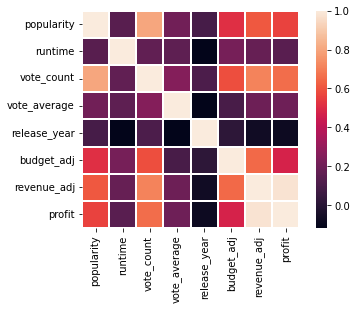

In [34]:
#Checking correlation between variable with the original dataset
corr = df.corr()
ax1 = sns.heatmap(corr, linewidth=2, square=True)

Using the unfiltered dataset, we see little correlationbetween movie rating with their result
Although in term of profitability, popularity, vote count and budget all seem to play a vital role

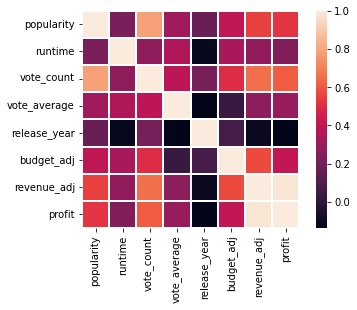

In [35]:
#Checking correlation with the dataset filterd out row with lack of budget and revenue data
corr = df_fin.corr()
ax1 = sns.heatmap(corr, linewidth=2, square=True)

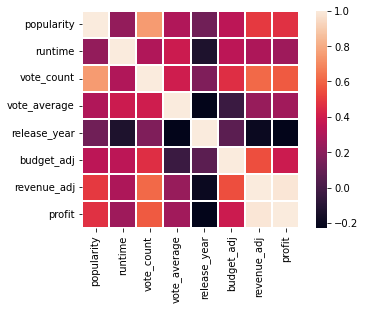

In [36]:
#Checking correlation with the dataset filterd out row with lack of budget and revenue data
corr = df_clean.corr()
ax1 = sns.heatmap(corr, linewidth=2, square=True)

<a id='conclusions'></a>
## Conclusions

1.	There have been an overall upward in both budget and profit in the movies industry in the 55 years covered in the dataset. In the period between 2010-2015, there’s a cut back in budget for movies with no clear turning point but the revenue in movies making still continues to maintain or grow
2.	The popularity of movies been growing in recent years
3.	The rating for certain genres like Horror, Crime, Action, Drama, Thriller been dropping over the years while Documentary, Music, Fantasy, War, Animation still maintain a constant rating
4.	Overall, Documentaries are the highest rated genre while Horror has the lowest rating
5.	The 4 last months of the year (Sep – Dec) and the 2 months leading to summer vacation (May-Jun) tend to be the prefer time for high rating movies to be release – the preference for these 2 periods could be attributed to various reasons, including:
* May and June are the period of summer vacations in most countries so this period in general boost a better demand for recreational activities
* Before 2004, the Oscar are hosted between late March to early April, while after 2004 it’s move up a month to late February to early March. And movies released within 3 months leading to the Oscar has observed to have a much better chance of winning the awards
(Further examination was discussed in this article) 
6.	Higher rating movies (above 7.0 in average rating) have better profit level comparing to the lower tiles
7.	When examining the movies with viable financial results and vote_count > 100,  there’s a positive relationship between vote_average and profit, popularity and vote_count – Although profit has a much between relationship with popularity and vote_count


### Limitation
1. The inacuracy in budget and revenue data cause the calculation and estimation to be inacurate
2. While in some analysis, I use the dataset with the condition of movies with more than 100 vote count to represent a more accurate average rating, the higher vote count does have a strong correlation with vote average so this may off set the average rating and result in a higher rating


### Reference
https://www.theringer.com/oscars/2018/2/28/17060396/best-oscar-movie-release-date